## Biggest cylinder inside a Sphere

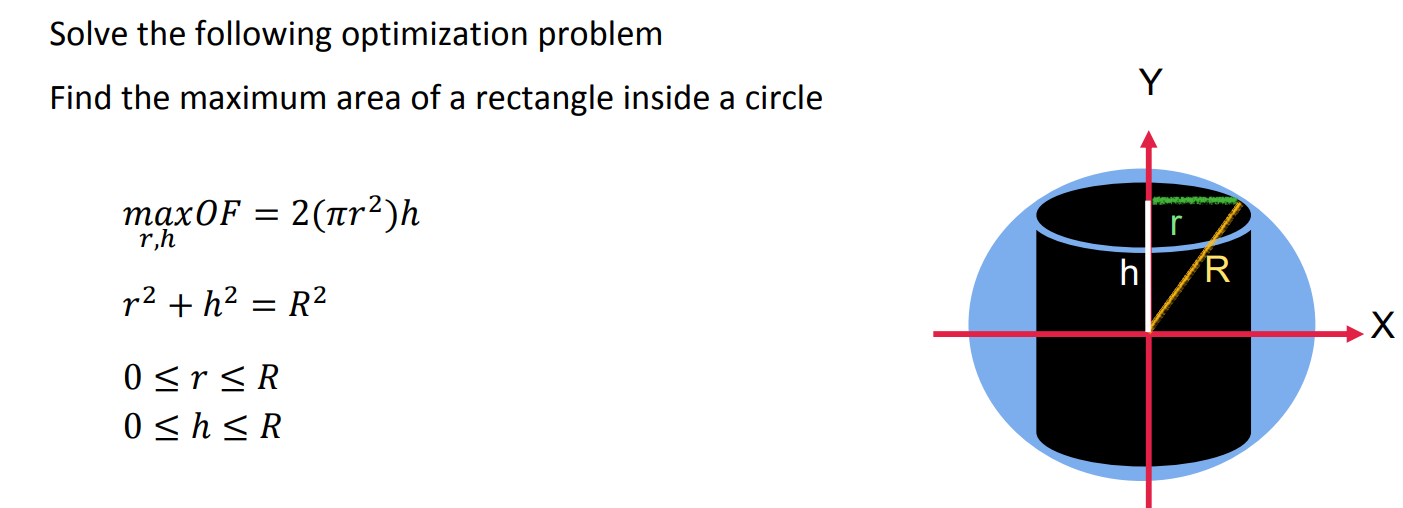

 ### Google Colab

In [1]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
ipopt_executable = '/content/ipopt'

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 49 kB 853 kB/s 


## Mac-OS

In [ ]:
!pip install -q pyomo
!curl -s https://ampl.com/dl/open/ipopt/ipopt-osx.zip --output ipopt-osx.zip
!tar xf ipopt-osx.zip ipopt
ipopt_executable = "./ipopt"
!rm ipopt-osx.zip

## Window PC

In [ ]:
!conda install -c conda-forge pyomo pyomo.extras
!conda install -c conda-forge/label/cf201901 ipopt 

In [ ]:
from pyomo.environ import *
import numpy as np


In [ ]:
model = ConcreteModel()
model.R=Param(initialize=1)
model.h=Var(bounds=(0,model.R), initialize=model.R)
model.r=Var(bounds=(0,model.R), initialize=model.R)
model.C=Constraint(expr=model.r**2+model.h**2==model.R**2)
model.OF=Objective(expr=2*np.pi*(model.r**2)*model.h,sense=maximize)

In [ ]:
opt     = SolverFactory('ipopt')
results = opt.solve(model);

In [ ]:
print('r=' ,round(value(model.r),2))
print('h=' ,round(value(model.h),2))
print('OF=',round(value(model.OF),2))

r= 0.82
h= 0.58
OF= 2.42
